## 2.2. Inferencia Estadística

La inferencia estadística se refiere a los métodos y procedimientos que permiten sacar conclusiones sobre una población a partir de una muestra de datos. Esta rama de la estadística es fundamental en Data Science, ya que nos permite hacer predicciones y tomar decisiones basadas en datos.

### 2.2.1. Estimación

La estimación es el proceso de inferir el valor de un parámetro poblacional a partir de una muestra. Los métodos de estimación se dividen en estimadores puntuales y por intervalos.

#### 2.2.1.1. Estimadores puntuales y por intervalos

**Estimadores puntuales:** Un estimador puntual es un valor único que sirve como mejor estimación del parámetro poblacional. Por ejemplo, la media muestral es un estimador puntual de la media poblacional.

**Estimadores por intervalos:** Un estimador por intervalos proporciona un rango de valores que, con cierta probabilidad, contiene el parámetro poblacional. Este rango se denomina intervalo de confianza.

##### 2.2.1.1.1. Propiedades de los estimadores (sesgo, consistencia)

- **Sesgo:** Un estimador es insesgado si su valor esperado es igual al verdadero valor del parámetro. En otras palabras, no tiende a sobrestimar o subestimar el parámetro.
  
  $$ \text{Sesgo}(\hat{\theta}) = E[\hat{\theta}] - \theta $$

- **Consistencia:** Un estimador es consistente si, a medida que aumenta el tamaño de la muestra, el estimador converge en probabilidad al verdadero valor del parámetro.

##### 2.2.1.1.2. Intervalos de confianza

Un intervalo de confianza proporciona un rango de valores dentro del cual se espera que se encuentre el parámetro poblacional con una cierta probabilidad (nivel de confianza). Por ejemplo, un intervalo de confianza del 95% para la media poblacional puede ser calculado como:

$$ \bar{x} \pm z_{\alpha/2} \left(\frac{\sigma}{\sqrt{n}}\right) $$

Donde:
- $\bar{x}$ es la media muestral.
- $z_{\alpha/2}$ es el valor crítico de la distribución normal estándar.
- $\sigma$ es la desviación estándar poblacional.
- $n$ es el tamaño de la muestra.

#### 2.2.1.2. Métodos de máxima verosimilitud

La máxima verosimilitud es un método de estimación que encuentra los valores de los parámetros que maximizan la probabilidad (verosimilitud) de observar los datos dados.

##### 2.2.1.2.1. Función de verosimilitud

La función de verosimilitud, $L(\theta)$, es la probabilidad de observar los datos dados los parámetros $\theta$. Para una muestra de datos independientes y distribuidos idénticamente, la función de verosimilitud es:

$$ L(\theta) = \prod_{i=1}^{n} f(x_i; \theta) $$

Donde $f(x_i; \theta)$ es la función de densidad de probabilidad de los datos.

##### 2.2.1.2.2. Estimación de parámetros con Python

In [3]:
import numpy as np
from scipy.stats import norm

# Datos de ejemplo
data = np.random.normal(loc=5, scale=2, size=100)

# Función de verosimilitud para una distribución normal
def log_likelihood(params, data):
    mu, sigma = params
    return -np.sum(norm.logpdf(data, mu, sigma))

# Estimación de parámetros usando optimización
from scipy.optimize import minimize

initial_params = [0, 1]  # Inicialización de mu y sigma
results = minimize(log_likelihood, initial_params, args=(data,))
mu_mle, sigma_mle = results.x

### 2.2.2. Pruebas de hipótesis

Las pruebas de hipótesis son procedimientos estadísticos que permiten tomar decisiones sobre los parámetros poblacionales basándose en los datos muestrales. Estas pruebas ayudan a validar o refutar una hipótesis formulada.

#### 2.2.2.1. Pruebas paramétricas y no paramétricas

**Pruebas paramétricas:** Estas pruebas asumen que los datos siguen una distribución específica. Ejemplos incluyen el t-test y ANOVA.

**Pruebas no paramétricas:** Estas pruebas no asumen una distribución específica para los datos. Ejemplos incluyen la prueba de Chi-cuadrado y la prueba de Wilcoxon.

##### 2.2.2.1.1. t-test y ANOVA

- **t-test:** Se utiliza para comparar las medias de dos grupos. Puede ser de una muestra (para comparar la media muestral con un valor conocido) o de dos muestras independientes.

  $$ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{s_p^2 \left(\frac{1}{n_1} + \frac{1}{n_2}\right)}} $$

  Donde $s_p^2$ es la varianza combinada de las dos muestras.

- **ANOVA:** Se utiliza para comparar las medias de tres o más grupos. Analiza las diferencias entre las medias y determina si al menos una de ellas es significativamente diferente.

  $$ F = \frac{\text{Variabilidad entre grupos}}{\text{Variabilidad dentro de los grupos}} $$

##### 2.2.2.1.2. Chi-cuadrado y prueba de Wilcoxon

- **Chi-cuadrado:** Se utiliza para evaluar la independencia entre dos variables categóricas.

  $$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$

  Donde $O_i$ son las frecuencias observadas y $E_i$ son las frecuencias esperadas.

- **Prueba de Wilcoxon:** Es una prueba no paramétrica que compara dos muestras relacionadas o emparejadas. 

#### 2.2.2.2. Implementación de pruebas en Python

Python proporciona herramientas en `scipy.stats` para realizar estas pruebas de manera sencilla.

##### 2.2.2.2.1. Uso de scipy.stats

In [4]:
from scipy import stats

# Datos de ejemplo
data1 = np.random.normal(loc=5, scale=2, size=100)
data2 = np.random.normal(loc=6, scale=2, size=100)

# t-test para muestras independientes
t_stat, p_value = stats.ttest_ind(data1, data2)
print(f"t-test: t_stat = {t_stat}, p_value = {p_value}")

# ANOVA para tres grupos
data3 = np.random.normal(loc=7, scale=2, size=100)
f_stat, p_value = stats.f_oneway(data1, data2, data3)
print(f"ANOVA: F_stat = {f_stat}, p_value = {p_value}")

# Prueba de Chi-cuadrado
observed = np.array([10, 20, 30])
expected = np.array([15, 15, 30])
chi2_stat, p_value = stats.chisquare(observed, expected)
print(f"Chi-cuadrado: chi2_stat = {chi2_stat}, p_value = {p_value}")

# Prueba de Wilcoxon
data4 = np.random.normal(loc=5, scale=2, size=100)
wilcoxon_stat, p_value = stats.wilcoxon(data1, data4)
print(f"Prueba de Wilcoxon: stat = {wilcoxon_stat}, p_value = {p_value}")

t-test: t_stat = -5.016447751687939, p_value = 1.1674008916869168e-06
ANOVA: F_stat = 37.1195835024443, p_value = 4.080796892025585e-15
Chi-cuadrado: chi2_stat = 3.3333333333333335, p_value = 0.18887560283756186
Prueba de Wilcoxon: stat = 2079.0, p_value = 0.12515445955953292


##### 2.2.2.2.2. Interpretación y visualización de resultados

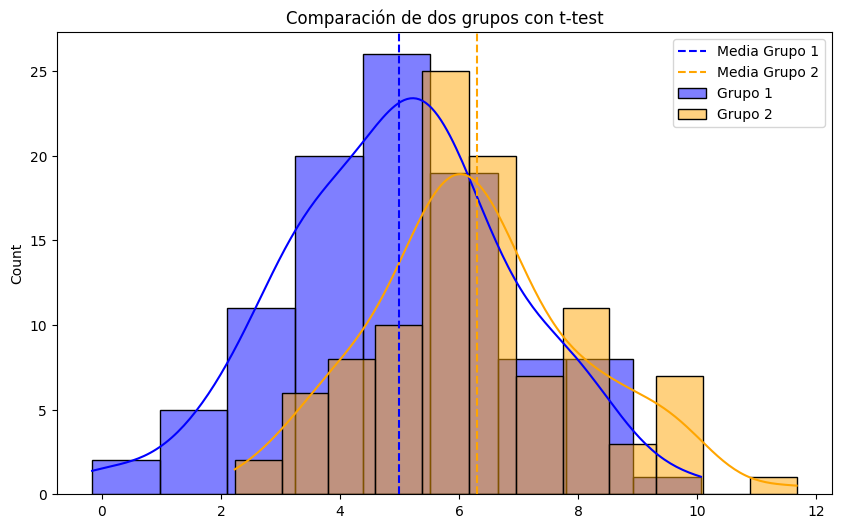

In [6]:
# Visualización de los resultados del t-test
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data1, color='blue', kde=True, label='Grupo 1')
sns.histplot(data2, color='orange', kde=True, label='Grupo 2')
plt.axvline(np.mean(data1), color='blue', linestyle='--', label='Media Grupo 1')
plt.axvline(np.mean(data2), color='orange', linestyle='--', label='Media Grupo 2')
plt.legend()
plt.title('Comparación de dos grupos con t-test')
plt.show()